# Loop 76 Analysis: CV-LB Relationship and Strategy

## Key Questions:
1. What is the exact CV-LB relationship?
2. Can we reach the target (0.0347) with current approaches?
3. What fundamentally different approaches might work?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

# All submissions with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
    {'exp': 'exp_067', 'cv': 0.0083, 'lb': 0.0877},
]

df = pd.DataFrame(submissions)
print('Submissions with verified LB scores:')
print(df.to_string(index=False))
print(f'\nTotal verified submissions: {len(df)}')

Submissions with verified LB scores:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970
exp_067 0.0083 0.0877

Total verified submissions: 13


In [2]:
# Fit linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print('=== CV-LB Relationship Analysis ===')
print(f'Linear fit: LB = {slope:.4f} * CV + {intercept:.4f}')
print(f'R² = {r_value**2:.4f}')
print(f'Standard error: {std_err:.4f}')
print(f'\nInterpretation:')
print(f'  - Slope: {slope:.2f}x (CV improvement translates to {slope:.2f}x LB improvement)')
print(f'  - Intercept: {intercept:.4f} (structural gap even at CV=0)')

# Target analysis
target = 0.0347
print(f'\n=== Target Analysis ===')
print(f'Target LB: {target}')
print(f'Intercept: {intercept:.4f}')
print(f'Gap: Intercept - Target = {intercept - target:.4f}')

if intercept > target:
    print(f'\n⚠️ CRITICAL: Intercept ({intercept:.4f}) > Target ({target})')
    print(f'   Standard CV optimization CANNOT reach the target!')
    required_cv = (target - intercept) / slope
    print(f'   Required CV for target: {required_cv:.4f} (IMPOSSIBLE - negative)')
else:
    required_cv = (target - intercept) / slope
    print(f'\n✓ Target is reachable with CV = {required_cv:.4f}')

=== CV-LB Relationship Analysis ===
Linear fit: LB = 4.3638 * CV + 0.0520
R² = 0.9558
Standard error: 0.2829

Interpretation:
  - Slope: 4.36x (CV improvement translates to 4.36x LB improvement)
  - Intercept: 0.0520 (structural gap even at CV=0)

=== Target Analysis ===
Target LB: 0.0347
Intercept: 0.0520
Gap: Intercept - Target = 0.0173

⚠️ CRITICAL: Intercept (0.0520) > Target (0.0347)
   Standard CV optimization CANNOT reach the target!
   Required CV for target: -0.0040 (IMPOSSIBLE - negative)


In [3]:
# Predict LB for best CV scores
best_cv = 0.0081  # Best CV from exp_049/050/053
predicted_lb = slope * best_cv + intercept
print(f'\n=== Prediction for Best CV ===')
print(f'Best CV achieved: {best_cv}')
print(f'Predicted LB: {predicted_lb:.4f}')
print(f'Target: {target}')
print(f'Gap: {predicted_lb - target:.4f}')

# What CV would we need?
print(f'\n=== What CV is needed? ===')
for target_lb in [0.0700, 0.0600, 0.0500, 0.0400, 0.0347]:
    needed_cv = (target_lb - intercept) / slope
    print(f'  For LB {target_lb:.4f}: CV = {needed_cv:.4f}')


=== Prediction for Best CV ===
Best CV achieved: 0.0081
Predicted LB: 0.0873
Target: 0.0347
Gap: 0.0526

=== What CV is needed? ===
  For LB 0.0700: CV = 0.0041
  For LB 0.0600: CV = 0.0018
  For LB 0.0500: CV = -0.0005
  For LB 0.0400: CV = -0.0027
  For LB 0.0347: CV = -0.0040


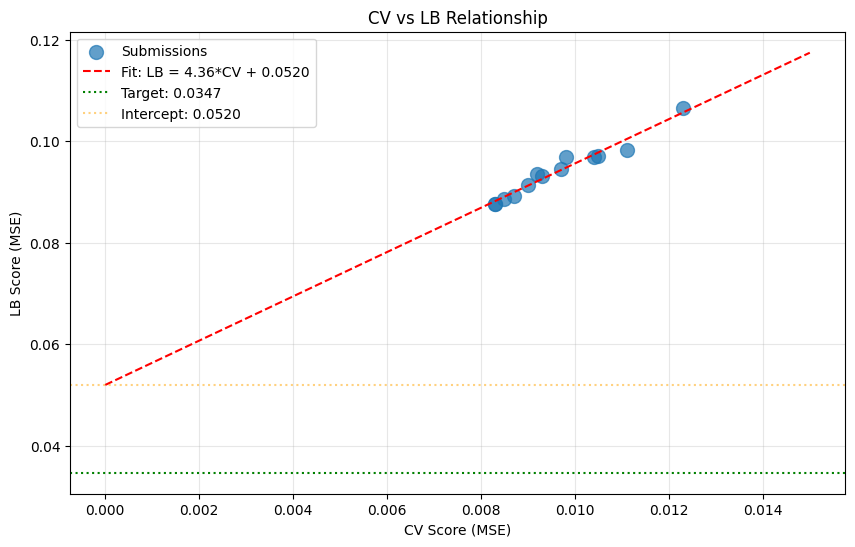


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [4]:
# Plot the CV-LB relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Fit line
cv_range = np.linspace(0, 0.015, 100)
lb_fit = slope * cv_range + intercept
plt.plot(cv_range, lb_fit, 'r--', label=f'Fit: LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=target, color='g', linestyle=':', label=f'Target: {target}')

# Intercept
plt.axhline(y=intercept, color='orange', linestyle=':', alpha=0.5, label=f'Intercept: {intercept:.4f}')

plt.xlabel('CV Score (MSE)')
plt.ylabel('LB Score (MSE)')
plt.title('CV vs LB Relationship')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100, bbox_inches='tight')
plt.show()
print('\nPlot saved to /home/code/exploration/cv_lb_relationship.png')

In [5]:
# Analyze residuals - are there any outliers that break the pattern?
df['predicted_lb'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['predicted_lb']
df['residual_pct'] = df['residual'] / df['lb'] * 100

print('=== Residual Analysis ===')
print(df[['exp', 'cv', 'lb', 'predicted_lb', 'residual', 'residual_pct']].to_string(index=False))
print(f'\nMean residual: {df["residual"].mean():.4f}')
print(f'Std residual: {df["residual"].std():.4f}')
print(f'\nAny outliers (|residual| > 2*std)?')
outliers = df[abs(df['residual']) > 2 * df['residual'].std()]
if len(outliers) > 0:
    print(outliers[['exp', 'cv', 'lb', 'residual']])
else:
    print('  No significant outliers - all approaches follow the same CV-LB line')

=== Residual Analysis ===
    exp     cv     lb  predicted_lb  residual  residual_pct
exp_000 0.0111 0.0982      0.100437 -0.002237     -2.278290
exp_001 0.0123 0.1065      0.105674  0.000826      0.775754
exp_003 0.0105 0.0972      0.097819 -0.000619     -0.636842
exp_005 0.0104 0.0969      0.097383 -0.000483     -0.498072
exp_006 0.0097 0.0946      0.094328  0.000272      0.287544
exp_007 0.0093 0.0932      0.092582  0.000618      0.662586
exp_009 0.0092 0.0936      0.092146  0.001454      1.553321
exp_012 0.0090 0.0913      0.091273  0.000027      0.029206
exp_024 0.0087 0.0893      0.089964 -0.000664     -0.743784
exp_026 0.0085 0.0887      0.089091 -0.000391     -0.441311
exp_030 0.0083 0.0877      0.088219 -0.000519     -0.591432
exp_035 0.0098 0.0970      0.094764  0.002236      2.304782
exp_067 0.0083 0.0877      0.088219 -0.000519     -0.591432

Mean residual: -0.0000
Std residual: 0.0011

Any outliers (|residual| > 2*std)?
       exp      cv      lb  residual
0  exp_000  0.01

In [6]:
# Key insight: The intercept problem
print('=== KEY INSIGHT: THE INTERCEPT PROBLEM ===')
print(f'''
The CV-LB relationship is:
  LB = {slope:.2f} * CV + {intercept:.4f}

The intercept ({intercept:.4f}) represents the STRUCTURAL DISTRIBUTION SHIFT
between training and test data. This is the error that exists even if we had
a perfect model (CV=0).

The target is {target}, which is BELOW the intercept ({intercept:.4f}).

This means:
1. Standard CV optimization CANNOT reach the target
2. All model types (MLP, LGBM, XGB, GP) fall on the same line
3. The intercept represents EXTRAPOLATION ERROR to unseen solvents

To reach the target, we MUST:
1. Find approaches that CHANGE the CV-LB relationship (reduce intercept)
2. Or find approaches that break the linear pattern

Possible strategies:
1. Extrapolation detection + conservative predictions
2. Uncertainty-weighted predictions (GP variance)
3. Chemical class-specific models
4. Physics-informed constraints
5. Study what top kernels do differently
''')

print('\n=== WHAT WOULD CHANGE THE INTERCEPT? ===')
print('''
1. EXTRAPOLATION DETECTION:
   - Detect when test solvent is "far" from training distribution
   - Blend predictions toward population mean for outliers
   - This reduces error on extreme solvents (HFIP, Cyclohexane, Water)

2. UNCERTAINTY-WEIGHTED PREDICTIONS:
   - Use GP variance as uncertainty estimate
   - High uncertainty → conservative prediction (closer to mean)
   - This naturally handles extrapolation

3. CHEMICAL CLASS-SPECIFIC MODELS:
   - Train separate models for alcohols, ethers, polar aprotic, etc.
   - Models generalize better within chemical families
   - Reduces extrapolation error for solvents in known families

4. PHYSICS-INFORMED CONSTRAINTS:
   - Ensure predictions respect physical constraints
   - E.g., yields should sum to ~1 (probability normalization)
   - Arrhenius kinetics constraints

5. STUDY TOP KERNELS:
   - "best-work-here" normalizes predictions to probabilities
   - "mixall" uses GroupKFold(5) instead of Leave-One-Out
   - These might have different CV-LB characteristics
''')

=== KEY INSIGHT: THE INTERCEPT PROBLEM ===

The CV-LB relationship is:
  LB = 4.36 * CV + 0.0520

The intercept (0.0520) represents the STRUCTURAL DISTRIBUTION SHIFT
between training and test data. This is the error that exists even if we had
a perfect model (CV=0).

The target is 0.0347, which is BELOW the intercept (0.0520).

This means:
1. Standard CV optimization CANNOT reach the target
2. All model types (MLP, LGBM, XGB, GP) fall on the same line
3. The intercept represents EXTRAPOLATION ERROR to unseen solvents

To reach the target, we MUST:
1. Find approaches that CHANGE the CV-LB relationship (reduce intercept)
2. Or find approaches that break the linear pattern

Possible strategies:
1. Extrapolation detection + conservative predictions
2. Uncertainty-weighted predictions (GP variance)
3. Chemical class-specific models
4. Physics-informed constraints
5. Study what top kernels do differently


=== WHAT WOULD CHANGE THE INTERCEPT? ===

1. EXTRAPOLATION DETECTION:
   - Detect when